In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from random import uniform as rndm

In [ ]:
x = [rndm(15, 80) for i in range(100)]
test_DF = pd.DataFrame({'house_metters': x,
                        'house_costs': [i*rndm(90000, 100000) for i in x]})
test_DF.info()
test_DF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_metters  100 non-null    float64
 1   house_costs    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


,house_metters,house_costs
count,100.000000,1.000000e+02
mean,47.165671,4.481821e+06
std,18.459307,1.772843e+06
min,15.999448,1.450874e+06
25%,31.726287,2.978513e+06
50%,45.268126,4.277557e+06
75%,63.266746,6.010991e+06
max,79.154332,7.672891e+06


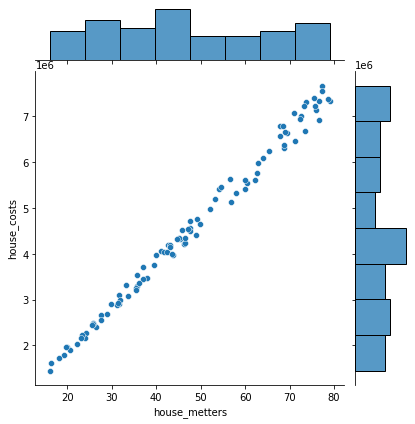

In [ ]:
import seaborn as sns
sns.jointplot(data=test_DF, x="house_metters", y="house_costs")

In [ ]:
X = pd.DataFrame(test_DF, columns=['house_metters'])
y = pd.DataFrame(test_DF, columns=['house_costs'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

check_test = pd.DataFrame({
    "y_test": y_test['house_costs'],
    "y_pred": y_pred.flatten(),
})

from sklearn.metrics import r2_score
r2_score(y_test['house_costs'], y_pred.flatten())

0.9908094277386745

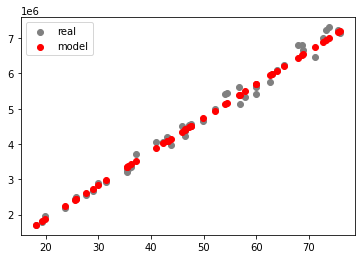

In [ ]:
plt.scatter(X_test, y_test, c='grey', label='real')
plt.scatter(X_test, y_pred, c='red', label='model')
plt.legend()
plt.show()

Чтобы узнать стоимость квартиры необходимо метраж умножить на 95021.65872535779
Например квартиара в 30 кв. м. будет стоить 2850650


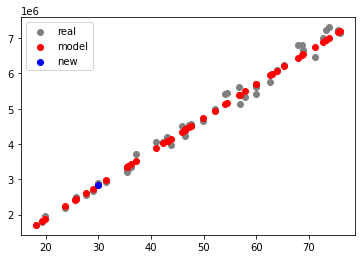

In [ ]:
coasts_per_m = float(lr.coef_)
metr = round(rndm(0, 100))
x = metr
y = x*coasts_per_m
plt.scatter(X_test, y_test, c='grey', label='real')
plt.scatter(X_test, y_pred, c='red', label='model')
plt.scatter(x, y, c='blue', label='new')
plt.legend()
print('Чтобы узнать стоимость квартиры необходимо метраж умножить на {}'.format(coasts_per_m))
print(f'Например квартиара в {metr} кв. м. будет стоить {round(coasts_per_m*metr)}')
plt.show()